# Prediciting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of prediciting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Probelm Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci


## 3. Evaluation

> if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

* ageage in years
* sex(1 = male; 0 = female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 =true; 0 = false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversible defect
* target1 or 0

1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina - Typical chest pain is a term used to describe chest pain that is likely caused by a heart problem
    * 1: Atypical angina - Atypical chest pain refers to chest pain where a person does not experience the typical diagnostic characteristics of chest pain
    * 2: Non-anginal pain - Non-cardiac chest pain is chest pain that is not caused by a heart problem
    * 3: Asymptomatic - Chest pain is usually a symptom of an underlying condition
4.  trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2*triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Normal
    * 1: ST-T wave abnormality
        * (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downsloping: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalim stress result
    * 1,3 = normal
    * 6 = fixed defect
    * 7 = reversable defect
14. target - diagnosis of heart disease (angiographic disease status)
    * 1 = yes
    * 0 = no
    

## Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What questions(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

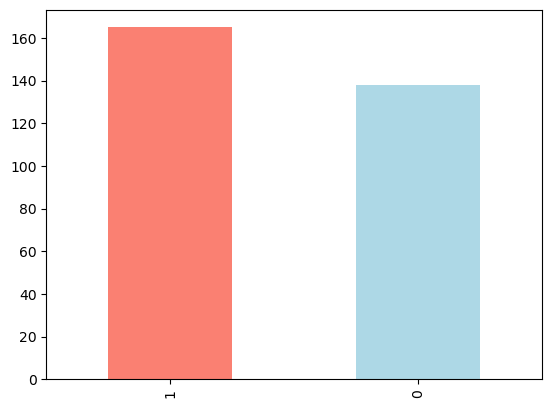

In [6]:
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing value?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


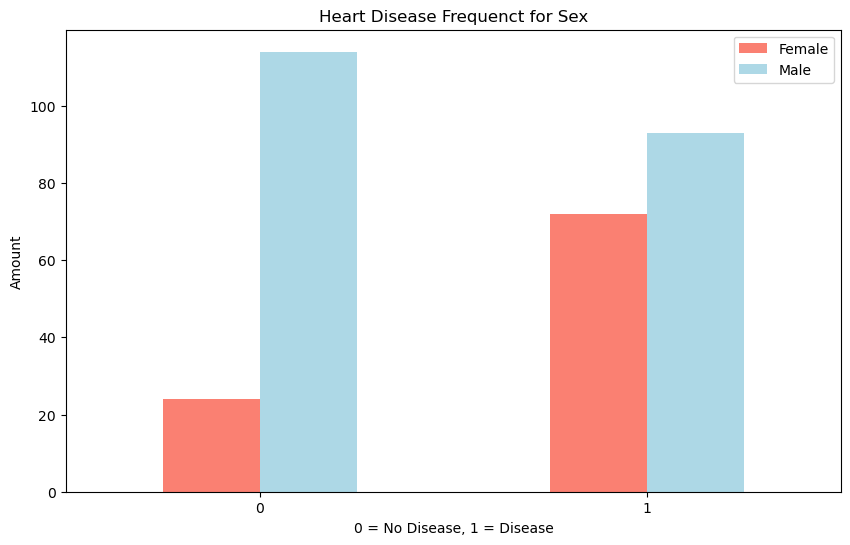

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue']);
plt.title("Heart Disease Frequenct for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [13]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

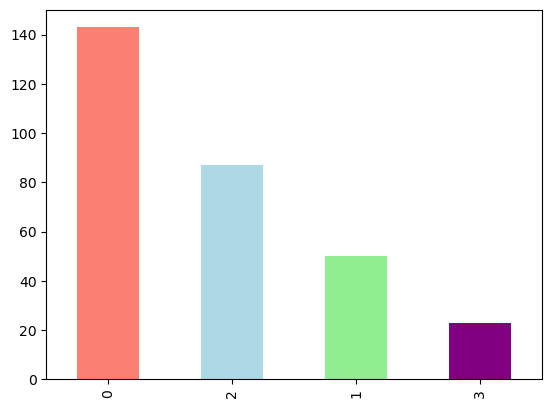

In [14]:
df.cp.value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightgreen", "purple"]);

In [15]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


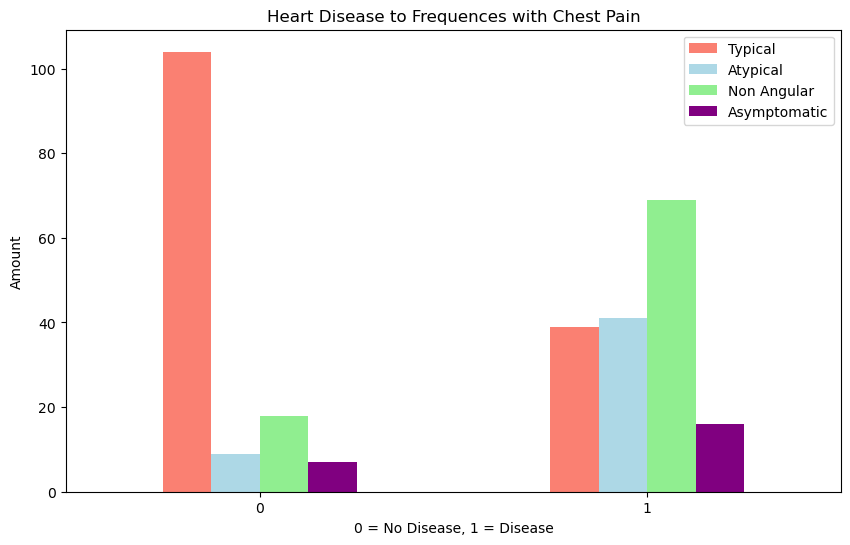

In [16]:
pd.crosstab(df.target, df.cp).plot(kind="bar",
                                   color=["salmon", "lightblue", "lightgreen", "purple"],
                                   figsize=(10, 6))
plt.title("Heart Disease to Frequences with Chest Pain")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Typical", "Atypical", "Non Angular", "Asymptomatic"])
plt.xticks(rotation=0);

### Age vs Heart Rate for Heart Disease

In [17]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


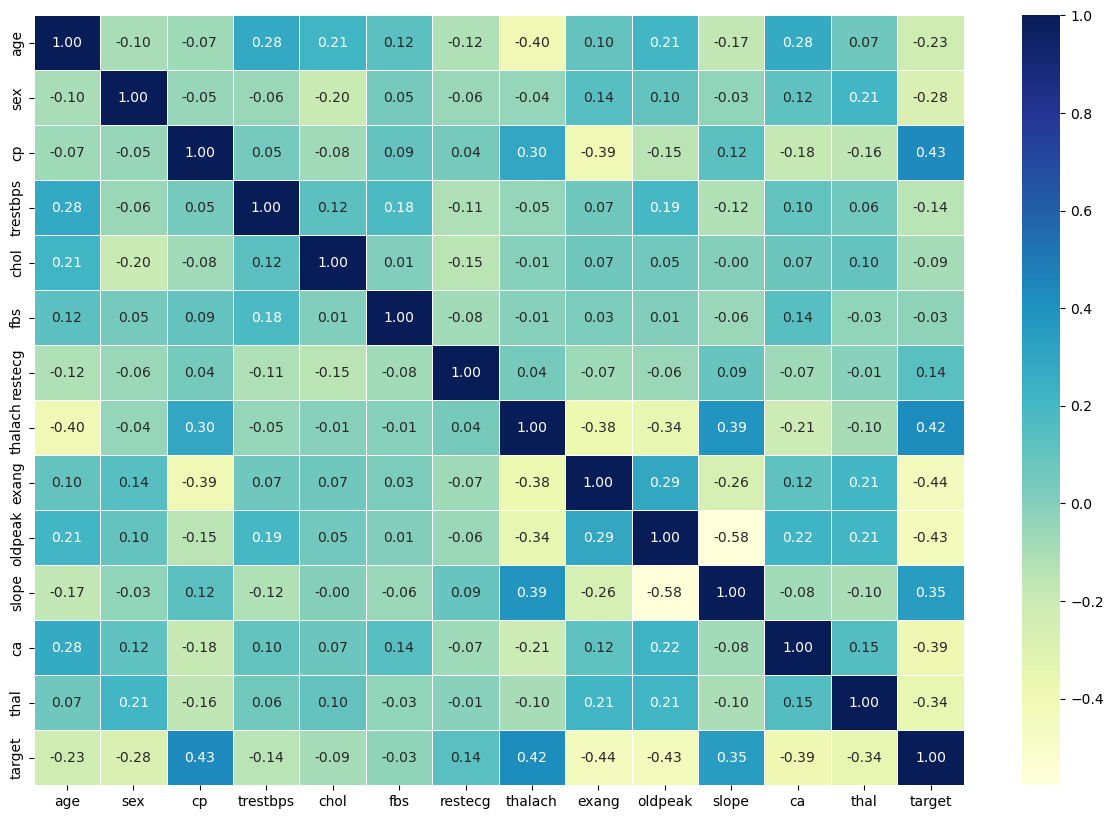

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

<img src="data/Steps-to-take-in-a-new-project.png"/>

## 5. Modeling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split our data into X and y
X = df.drop("target", axis=1)
y = df.target

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [27]:
y_train, len(y_train)

(93     1
 189    0
 106    1
 133    1
 14     1
       ..
 16     1
 299    0
 102    1
 15     1
 52     1
 Name: target, Length: 242, dtype: int64,
 242)

Now that we've gotten our data split into training and test set, it's time we build machine learning model.

We'll train it(find pattern) on the training set.

And we'll test it(Use the pattern) on the test set.

<img src="data/scikit_learn_map.png"/>
<Img src="data/Tools-you-can-use.png"/>

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [76]:
# Put into a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate a machine learning models.
    model : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data(no labels)
    y_train : training labels
    y_test : test lab
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep a model scores
    model_score = {}
    # Loop through the model
    for name, model in models.items():
        # Fit our model
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to the model scores
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [77]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\josep\Documents\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<Axes: >

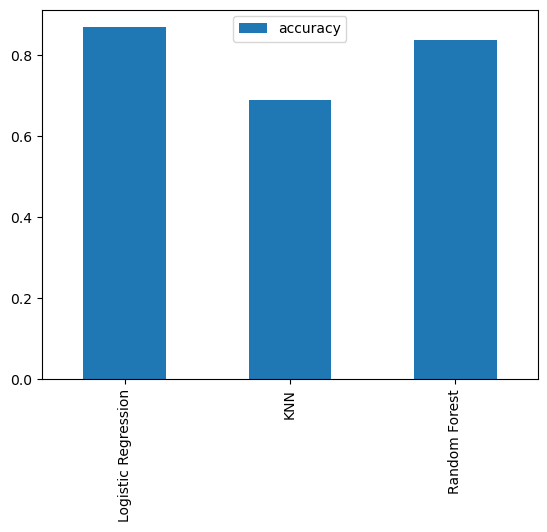

In [30]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar()

Now we've got our baseline model... And we know that our model first prediction aren't always what we should based our next step off. What should we do?

<img src="data/Classification-metrics.png"/>
<img src="data/confusion_matrix_anatomy.png"/>
<img src="data/Evaluating_a_classification_model.png"/>

Let's look at the following:

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1-score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)

## Hyperparameter tuning

In [31]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values of n-neighbors
neighbors = range(1, 21)

# Setup KNN instances
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithms
    knn.fit(X_train, y_train)
    
    # Update the train scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores

[1.0,
 0.8140495867768595,
 0.7727272727272727,
 0.7851239669421488,
 0.7644628099173554,
 0.7396694214876033,
 0.7396694214876033,
 0.743801652892562,
 0.7231404958677686,
 0.7024793388429752,
 0.7024793388429752,
 0.7024793388429752,
 0.7066115702479339,
 0.6818181818181818,
 0.6942148760330579,
 0.6818181818181818,
 0.6942148760330579,
 0.6776859504132231,
 0.6900826446280992,
 0.6776859504132231]

In [33]:
test_scores

[0.4262295081967213,
 0.5409836065573771,
 0.6229508196721312,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6229508196721312,
 0.5901639344262295,
 0.639344262295082,
 0.5737704918032787,
 0.639344262295082,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.5901639344262295,
 0.639344262295082,
 0.6065573770491803,
 0.639344262295082,
 0.6229508196721312]

Maximum KNN score on the test data: 68.85%


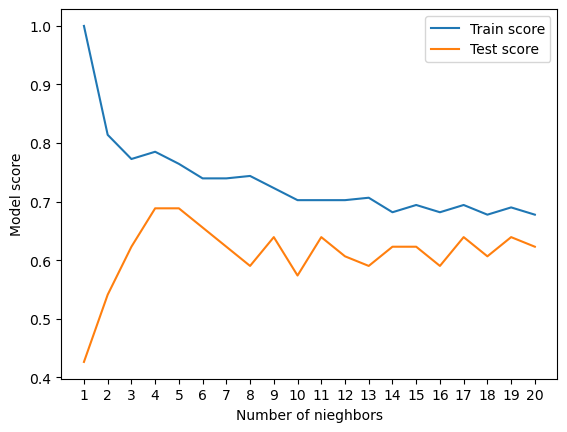

In [34]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of nieghbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV


In [78]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [79]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit radnom hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [80]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [81]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [39]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit randm hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
# Find the best hyperparamters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [41]:
rs_rf.score(X_test, y_test)

0.8032786885245902

In [42]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [43]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5, 
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [44]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [45]:
# Evaluate the grid search LogisticRegressionModel
gs_log_reg.score(X_test, y_test)

0.8524590163934426

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [46]:
# Make predicitions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [48]:
y_test

34     1
150    1
221    0
292    0
203    0
      ..
35     1
233    0
128    1
177    0
146    1
Name: target, Length: 61, dtype: int64

**what is a roc curve?** ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

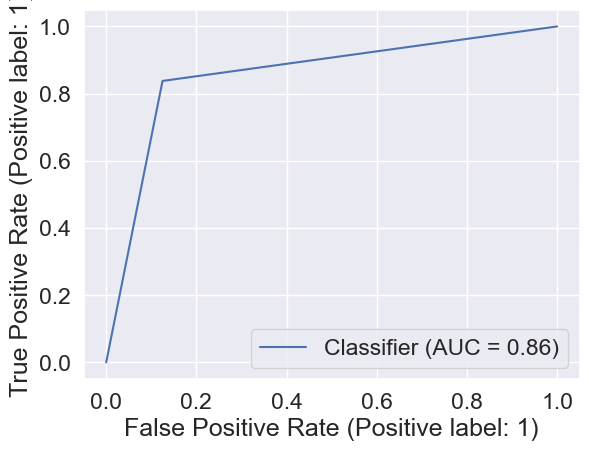

In [98]:
RocCurveDisplay.from_predictions(y_test, y_preds);

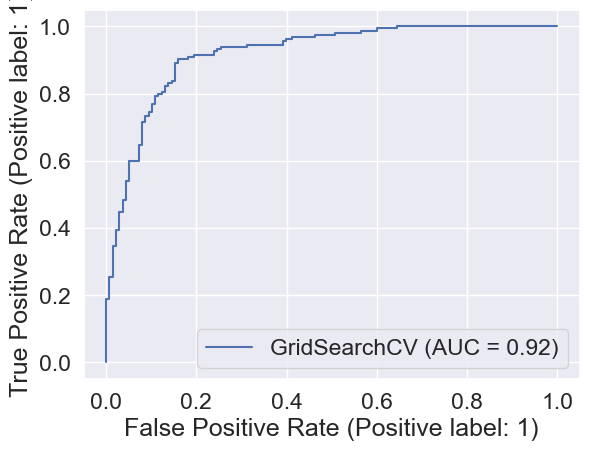

In [99]:
RocCurveDisplay.from_estimator(gs_log_reg, X, y);

In [71]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[21  3]
 [ 6 31]]


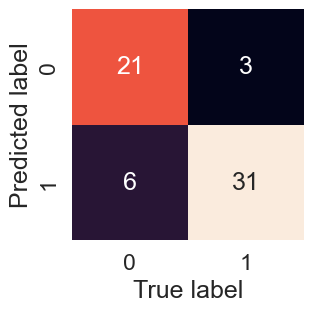

In [75]:
# Font size was changed to font_scale and sns.set was changed to sns.set_theme
sns.set_theme(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    PLots a nice looking confusion matrix using Seaborns's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

Now  we've got a ROC curve, an AUC matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [82]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.84      0.87        37

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



<img src="data/cross-validation.png"/>

### Calculate evaluation metrics using cross-validation

We're goinf to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [83]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [84]:
#  Create a new classifier with best parameters
clf = LogisticRegression(C=0.38566204211634725,
                         solver="liblinear")

In [85]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [86]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8380874316939891

In [87]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5, 
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

In [89]:
# Cross-validation recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [92]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8614850462777628

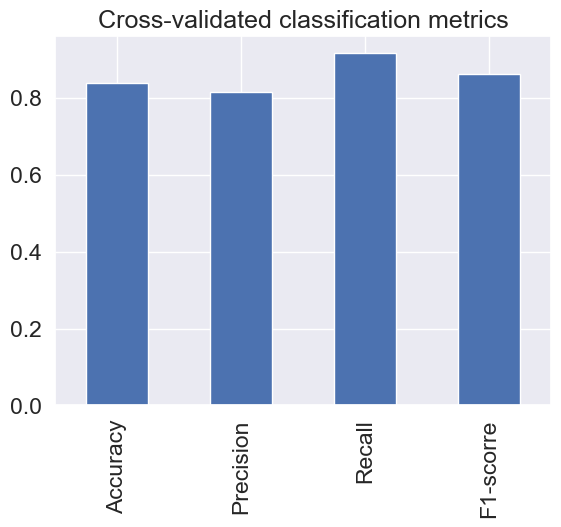

In [101]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-scorre": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding features importance is different for each machine learning model. One way to find features importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our Logistic Regression model...

In [102]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [103]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.38566204211634725,
                         solver="liblinear")
clf.fit(X_train, y_train);

In [105]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
# Check coef_
clf.coef_

array([[ 4.55656413e-03, -1.16177393e+00,  7.41263552e-01,
        -1.53599328e-02, -1.84573279e-05,  1.08764118e-01,
         5.44213156e-01,  2.75607043e-02, -7.51025943e-01,
        -6.29314342e-01,  1.97421480e-01, -5.43839692e-01,
        -6.99666330e-01]])

In [106]:
# Match coef's of features to colums
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0045565641272531385,
 'sex': -1.1617739286156095,
 'cp': 0.7412635515186888,
 'trestbps': -0.015359932844587356,
 'chol': -1.8457327893818423e-05,
 'fbs': 0.1087641177560456,
 'restecg': 0.5442131564439474,
 'thalach': 0.02756070432617739,
 'exang': -0.7510259427246915,
 'oldpeak': -0.629314342054876,
 'slope': 0.19742148001338833,
 'ca': -0.5438396916773586,
 'thal': -0.6996663303058326}

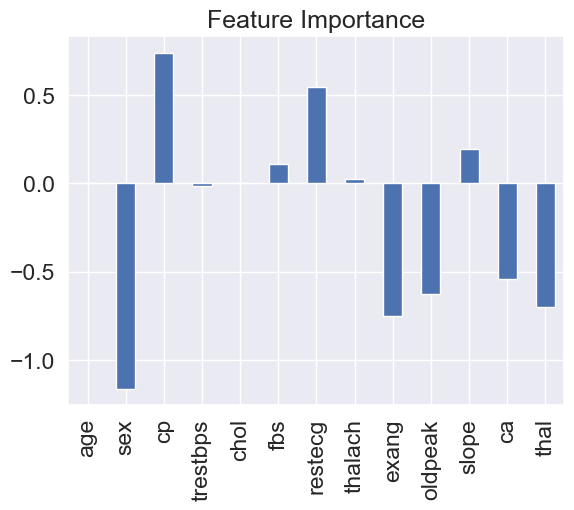

In [107]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [108]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [109]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with exercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downsloping: signs of unhealthy heart